# 数据分析

In [23]:
# 导入包
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [10]:
# 数据加载并转换成DataFrame
boston_df=pd.read_excel('boston_data.xlsx', sheet_name='Sheet1')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
# 构建线性回归预测模型
from sklearn.linear_model import LinearRegression
X = boston_df.drop("PRICE", axis = 1)
predict_model = LinearRegression()
predict_model.fit(X, boston_df['PRICE'])    #训练模型
print("回归系数为：", predict_model.coef_)   # 判断相关性

回归系数为： [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


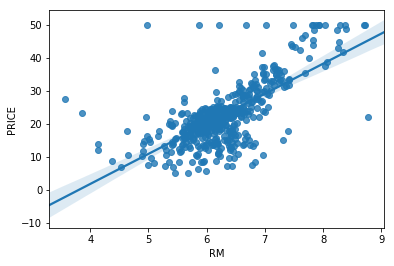

In [25]:
import seaborn as sns
sns.regplot( boston_df.RM, boston_df.PRICE)

In [29]:
# 房价预测
predict_model.predict(X)[0:10]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

In [31]:
# 模型评估-训练集和测试集的划分
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.PRICE, test_size=0.33, random_state=5)
# 构建模型
predict_model_2 = LinearRegression()
predict_model_2.fit(X_train, Y_train)
predict_train = predict_model_2.predict(X_train)
predict_test = predict_model_2.predict(X_test)
# 打印误差
print ("模型训练集的误差：", np.mean((Y_train - lm.predict(X_train)) ** 2))
print( "模型测试集的误差：", np.mean((Y_test - lm.predict(X_test)) ** 2))

模型训练集的误差： 20.080739881709054
模型测试集的误差： 25.58626026497307
